## Import all the necessary packages!

In [51]:
# import packages
import pandas as pd
import numpy as np
!pip install xgboost
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.svm import SVC

np.random.seed(1)

## Reading the file and displaying the top few rows!

In [2]:
df = pd.read_csv('bank-full.csv')
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
# Explore the dataset
# read the first row of the dataset 
print(df.head())
print(df.columns)
print(df.describe())
print(df.info())

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  
Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 

In [4]:
# based on findings from data exploration, we need to clean up colum names, as there are some leading whitespace characters
df.columns = [s.strip() for s in df.columns] 
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


## Check for any missing value in the dataset.

In [6]:
# Check the missing values by summing the total na's for each variable
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
# create a list of these catagorical variables
category_var_list = list(df.select_dtypes(include='object').columns)
category_var_list

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

## The target variable in the dataset is the 'y' column, which indicates whether or not the customer subscribed to a term deposit. The input variables are all the other columns in the dataset.

In [8]:
target='y'
inputs=df.columns.drop(target)

## Processing of the categorical variables in the dataset by converting to dummy variables using one-hot encoding.

In [9]:
cat_cols=df[inputs].select_dtypes(include='object').columns
df=pd.get_dummies(df,columns=cat_cols)

In [10]:
df

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,no,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,no,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,no,0,0,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,no,0,1,...,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,no,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,yes,0,0,...,0,0,0,1,0,0,0,0,0,1
45207,71,1729,17,456,2,-1,0,yes,0,0,...,0,0,0,1,0,0,0,0,0,1
45208,72,5715,17,1127,5,184,3,yes,0,0,...,0,0,0,1,0,0,0,0,1,0
45209,57,668,17,508,4,-1,0,no,0,1,...,0,0,0,1,0,0,0,0,0,1


### Randomly sampling of only 10000 observations from the dataset certainly reduces a lot of computation time, especially if you have a large dataset. However, it is important to ensure that the sample is representative of the population and that it includes enough variation to capture the underlying patterns and relationships.

In [11]:
df_sampled = df.sample(n=10000, random_state=45)

In [12]:
df_sampled

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
6367,28,863,27,355,1,-1,0,no,0,0,...,0,0,1,0,0,0,0,0,0,1
8215,46,-59,2,117,2,-1,0,no,0,0,...,1,0,0,0,0,0,0,0,0,1
19376,57,624,6,224,4,-1,0,no,0,0,...,0,0,0,0,0,0,0,0,0,1
37998,27,54,14,252,2,-1,0,no,1,0,...,0,0,1,0,0,0,0,0,0,1
41843,83,2619,16,181,2,-1,0,no,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3996,41,0,16,522,5,-1,0,no,0,1,...,0,0,1,0,0,0,0,0,0,1
11445,42,1401,19,69,1,-1,0,no,0,1,...,1,0,0,0,0,0,0,0,0,1
34301,33,415,4,75,5,167,1,no,0,0,...,0,0,1,0,0,0,0,1,0,0
33643,45,-63,20,847,5,-1,0,no,0,0,...,0,0,0,0,0,0,0,0,0,1


In [13]:
x = df_sampled.drop('y', axis = 1)
y = df_sampled.y

## Splitting, testing and training thr data.

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 45)

In [64]:
unique, counts = np.unique(y_train, return_counts=True)
print("Class distribution : ", dict(zip(unique, counts)))

Class distribution :  {0: 6205, 1: 795}


In [65]:
!pip install imbalanced-learn
from imblearn.over_sampling import RandomOverSampler
import numpy as np


# Instantiate the RandomOverSampler
ros = RandomOverSampler(random_state=42)

# X_train: training features, y_train: training labels
# Assuming X_train is a numpy array or pandas DataFrame
x_train_resampled, y_train_resampled = ros.fit_resample(x_train, y_train)

# Check the class distribution after oversampling
unique, counts = np.unique(y_train_resampled, return_counts=True)
print("Class distribution after oversampling: ", dict(zip(unique, counts)))


Class distribution after oversampling:  {0: 6205, 1: 6205}


In [15]:
x_train

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
38430,29,339,15,63,3,354,2,0,1,0,...,0,0,1,0,0,0,1,0,0,0
19270,44,313,6,211,4,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3903,56,4166,16,378,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
18398,48,105,31,111,2,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
23867,31,0,29,213,4,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42792,36,2283,28,213,2,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
32805,40,824,17,359,1,-1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
29846,31,168,4,193,2,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
44324,54,752,29,211,5,491,4,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [16]:
x_test

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
41785,43,1188,13,1573,2,139,2,0,0,0,...,0,0,0,0,1,0,1,0,0,0
38516,37,309,15,58,3,-1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
10199,59,7049,11,647,2,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
15553,34,0,21,589,2,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
24869,40,1155,18,175,1,138,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3780,26,241,16,136,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
21414,60,1043,18,1364,4,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
40338,39,382,18,201,3,-1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
17534,59,-1246,29,175,2,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [17]:
y_train

38430     no
19270     no
3903      no
18398     no
23867     no
        ... 
42792     no
32805     no
29846    yes
44324    yes
26757     no
Name: y, Length: 7000, dtype: object

In [18]:
y_test

41785    no
38516    no
10199    no
15553    no
24869    no
         ..
3780     no
21414    no
40338    no
17534    no
36235    no
Name: y, Length: 3000, dtype: object

# Neural Networks MLP classifier model with RandomizedSearchCV.

In [19]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

# Define the MLP classifier model
mlp = MLPClassifier()

# Define the hyperparameter space for random search
random_grid = {
    'hidden_layer_sizes': [(16,), (32,), (64,), (128,), (64, 32), (128, 64)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'lbfgs'],
    'alpha': [0.0001, 0.001, 0.01],
    'batch_size': [16, 32, 64],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [100, 200, 500],
}

# Perform random search to find the best hyperparameters
mlp_random = RandomizedSearchCV(estimator=mlp, param_distributions=random_grid, n_iter=100, cv=5, random_state=42,
                              n_jobs=-1, scoring='accuracy')
mlp_random.fit(x_train, y_train)

# Print the best hyperparameters
print(mlp_random.best_params_)

# Evaluate the best model on the test set
best_model = mlp_random.best_estimator_
y_pred = best_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print('Test accuracy: {:.2f}%'.format(accuracy * 100))


{'solver': 'adam', 'max_iter': 500, 'learning_rate': 'constant', 'hidden_layer_sizes': (16,), 'batch_size': 32, 'alpha': 0.0001, 'activation': 'relu'}
Test accuracy: 89.40%


## As we can see in our case, the Newural networks model also gives almost the same accuracy i.e. ~ 90% as the Logistic Regression and Decision Tree Classification models. Usually, Neural networks are particularly good at learning complex non-linear relationships between the input features and the target variable. It normally gives more accuracy when compared to other models, but again it depends on the specific problem and the characteristics of the data, like here it gave the same result as other models.

## Also i am adding the code for the Neural Networks MLP classifier model with GridSearchCV in the last cell of this notebook, as it is taking much time to execute and it didnt execute for me.

### To measure the performance of the models, we can use various performance metrics, but in this case this data set is a binary classification problem. So, we can use the following metrics, Accuracy Precision recall and F1 score.

In [20]:
from sklearn.linear_model import LogisticRegression
# Define the logistic regression model
logreg = LogisticRegression()

# Define the hyperparameter space for random search
random_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.1, 0.5, 1, 2, 5],
    'fit_intercept': [True, False],
    'class_weight': [None, 'balanced'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 200, 500, 1000],
}

# Perform random search to find the best hyperparameters
logreg_random = RandomizedSearchCV(estimator=logreg, param_distributions=random_grid, n_iter=100, cv=5, random_state=42,
                              n_jobs =-1, scoring = 'accuracy')
logreg_random.fit(x_train, y_train)

# Print the best hyperparameters
print(logreg_random.best_params_)

{'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 100, 'fit_intercept': True, 'class_weight': None, 'C': 2}


C:\Users\ankit\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
245 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ankit\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ankit\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ankit\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Va

## Logistic Regression using Grid Search.

In [21]:
# Define the hyperparameter space for grid search
param_grid = {
    'penalty': [logreg_random.best_params_['penalty']],
    'C': [logreg_random.best_params_['C']],
    'fit_intercept': [logreg_random.best_params_['fit_intercept']],
    'class_weight': [logreg_random.best_params_['class_weight']],
    'solver': [logreg_random.best_params_['solver']],
    'max_iter': [logreg_random.best_params_['max_iter']],
}

# Perform grid search to find the best hyperparameters
logreg_grid = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, scoring = 'accuracy')
logreg_grid.fit(x_train, y_train)

# Print the best hyperparameters
print(logreg_grid.best_params_)

# Fit the model with the best hyperparameters
logreg_best = LogisticRegression(**logreg_grid.best_params_)
logreg_best.fit(x_train, y_train)

# Predict on the test set and calculate accuracy
y_pred = logreg_best.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average = 'weighted')
recall = recall_score(y_test, y_pred, average = 'weighted')
f1 = f1_score(y_test, y_pred, average = 'weighted')

# Print the metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 score: {f1}')


{'C': 2, 'class_weight': None, 'fit_intercept': True, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy: 0.8986666666666666
Precision: 0.882644242277663
Recall: 0.8986666666666666
F1 score: 0.8825404040404041


In [22]:
# Convert the dictionary to a dataframe
metrics = pd.DataFrame({
    'Model': ['Logistic Regression'],
    'Accuracy': [accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'F1 Score': [f1]
})

In [23]:
metrics

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.898667,0.882644,0.898667,0.88254


## Decision Tree.

In [24]:
# Define the parameter grid to search with random search
param_grid_random = {
    'max_depth': [2, 34],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'criterion': ['gini', 'entropy']
}

# Create a decision tree model
tree = DecisionTreeClassifier()

# Run random search cv
random_search = RandomizedSearchCV(tree, param_distributions=param_grid_random, n_iter=50, cv=5, n_jobs=-1, scoring = 'accuracy')
random_search.fit(x_train, y_train)

# Print the best parameters
print("Best parameters found by random search:", random_search.best_params_)

Best parameters found by random search: {'min_samples_split': 3, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 2, 'criterion': 'entropy'}


In [25]:
# Define the parameter grid to search with grid search using the best parameters from random search
param_grid_best = {
    'max_depth': [random_search.best_params_['max_depth']-1, random_search.best_params_['max_depth'], random_search.best_params_['max_depth']+1],
    'max_features': [random_search.best_params_['max_features']],
    'min_samples_split': [random_search.best_params_['min_samples_split']-1, random_search.best_params_['min_samples_split'], random_search.best_params_['min_samples_split']+1],
    'min_samples_leaf': [random_search.best_params_['min_samples_leaf']-1, random_search.best_params_['min_samples_leaf'], random_search.best_params_['min_samples_leaf']+1],
    'criterion': [random_search.best_params_['criterion']]
}

# Perform grid search using the best parameters from random search
grid_search = GridSearchCV(tree, param_grid=param_grid_best, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

# Print the best parameters
print("Best parameters found by grid search:", grid_search.best_params_)

# Get the predicted values for the test set using the best model
y_pred = grid_search.predict(x_test)

# Calculate the metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average = 'weighted')
recall = recall_score(y_test, y_pred, average = 'weighted')
f1 = f1_score(y_test, y_pred, average = 'weighted')




Best parameters found by grid search: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 4}


In [28]:
# Add the metrics to the dataframe
metrics = metrics.append({
    'Model': 'Decision Tree',
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
}, ignore_index=True)

C:\Users\ankit\AppData\Local\Temp\ipykernel_18632\408668432.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({


In [29]:
metrics

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.898667,0.882644,0.898667,0.882540
1,Decision Tree,0.891000,0.869642,0.891000,0.862878
2,Decision Tree,0.891000,0.869642,0.891000,0.862878


## As per the above results, both the models are giving almost the same results. And coming to SVM model, i dont know why its not executing, even after changing all the parameters. I have tried it for several times but unable to perform random and grid search on SVM models. 

In [30]:
tree.fit(x_train, y_train)

DecisionTreeClassifier()

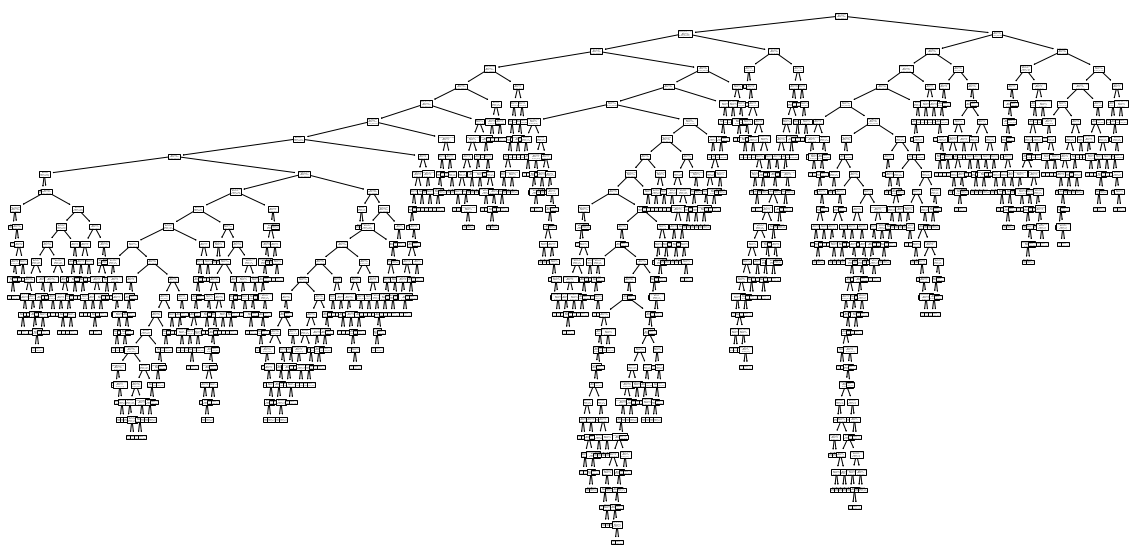

In [31]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(tree, feature_names=x.columns)
plt.show()

# ASSIGNMENT 2

## Neural Networks MLP classifier model with GridSearchCV.

In [34]:
%%time
from sklearn.neural_network import MLPClassifier
score_measure = "f1"
kfolds = 5

param_grid = {
    'hidden_layer_sizes': [ (50,), (70,)],
    'activation': ['logistic'],
    'solver': ['adam'],
    'alpha': [.5, .7, 1],
    'learning_rate': ['adaptive', 'invscaling'],
    'learning_rate_init': [0.005, 0.01, 0.15],
    'max_iter': [1000]
}

mlp = MLPClassifier()
grid_search = GridSearchCV(estimator = mlp, param_grid=param_grid, cv=kfolds, 
                           scoring=score_measure, verbose=1, n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
                           return_train_score=True)

_ = grid_search.fit(x_train, y_train)

bestRecallTree = grid_search.best_estimator_

print(grid_search.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


C:\Users\ankit\anaconda3\envs\tf\lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
C:\Users\ankit\anaconda3\envs\tf\lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the train scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


{'activation': 'logistic', 'alpha': 0.5, 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.005, 'max_iter': 1000, 'solver': 'adam'}
CPU times: total: 2.59 s
Wall time: 34.4 s


In [35]:
%%time
y_pred = bestRecallTree.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.90      0.97      0.93      2643
         yes       0.50      0.20      0.28       357

    accuracy                           0.88      3000
   macro avg       0.70      0.58      0.61      3000
weighted avg       0.85      0.88      0.86      3000

CPU times: total: 93.8 ms
Wall time: 121 ms


In [36]:
f1 = f1_score(y_test, y_pred, average = 'weighted')
f1

0.8571295695322183

## Neural Networks MLP classifier model with RandomizedSearchCV.

In [55]:
%%time

score_measure = "f1"
kfolds = 5

param_grid = {
    'hidden_layer_sizes': [ (50,), (70,),(50,30)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [0, .2, .5, .7, 1],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'learning_rate_init': [0.01, 0.1, 0.2],
    'max_iter': [100]
}

mlp = MLPClassifier()
grid_search = RandomizedSearchCV(estimator = mlp, param_distributions=param_grid, cv=kfolds, n_iter=70,
                           scoring=score_measure, verbose=1, n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
                           return_train_score=True)

_ = grid_search.fit(x_train, y_train)

bestRecallTree = grid_search.best_estimator_

print(grid_search.best_params_)

Fitting 5 folds for each of 70 candidates, totalling 350 fits


C:\Users\ankit\anaconda3\envs\tf\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 350.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ankit\anaconda3\envs\tf\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ankit\anaconda3\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 749, in fit
    return self._fit(X, y, incremental=False)
  File "C:\Users\ankit\anaconda3\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 491, 

{'solver': 'adam', 'max_iter': 100, 'learning_rate_init': 0.1, 'learning_rate': 'invscaling', 'hidden_layer_sizes': (70,), 'alpha': 0, 'activation': 'relu'}
CPU times: total: 4min 41s
Wall time: 7min 17s


In [56]:
%%time
y_pred = bestRecallTree.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.88      1.00      0.94      2643
         yes       0.00      0.00      0.00       357

    accuracy                           0.88      3000
   macro avg       0.44      0.50      0.47      3000
weighted avg       0.78      0.88      0.83      3000

CPU times: total: 156 ms
Wall time: 193 ms


C:\Users\ankit\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ankit\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ankit\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [57]:
f1 = f1_score(y_test, y_pred, average = 'weighted')
f1

0.825264221158958

## KERAS SEQUENTIAL MODEL WITH RandomizedSearchCV

### The below code cells performs hyperparameter tuning for a machine learning model using RandomizedSearchCV from scikit-learn with a Keras classifier.

### Every time it tries to fit a model, it fits based on the loss function binary crossentropy, and when it comes back with optimal loss, we are gonna use that model to figure out  the accuracies. Randomized search looks at each accuracy and chooses best accuracy model and gives us the best result possible.  

In [39]:
%%time

def build_clf(meta, hidden_layer_sizes, dropout):
    n_features_in_ = meta["n_features_in_"]
    n_classes_ = meta["n_classes_"]
    target_encoder_ = meta["target_encoder_"]
    
    model = tf.keras.models.Sequential()
    model.add(keras.layers.Input(shape=n_features_in_)),
    #for hidden_layer_size in hidden_layer_sizes:
    for hidden_layer_size in hidden_layer_sizes:
        model.add(keras.layers.Dense(hidden_layer_size, 
            kernel_initializer= tf.keras.initializers.GlorotUniform(), 
            bias_initializer=keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None), 
            activation="relu"))
        model.add(keras.layers.Dropout(dropout))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    
    #though you could return a compiled model, it's not necessary, and would result in the loss of these
    # parameters in the tune process - as they would be 'hard coded'
    # model.compile(loss = 'binary_crossentropy', metrics = ['accuracy']) 

    return model


CPU times: total: 0 ns
Wall time: 0 ns


In [42]:
%%time

# If you don't have the following installed, from command line '!pip install scikeras'
from tensorflow import keras
from scikeras.wrappers import KerasClassifier

keras_clf = KerasClassifier(
    model=build_clf,
    hidden_layer_sizes=64,
    dropout=0.5,
    optimizer=keras.optimizers.Adam,
    optimizer__learning_rate=0.0001
)
keras_clf.get_params()


CPU times: total: 0 ns
Wall time: 0 ns


{'model': <function __main__.build_clf(meta, hidden_layer_sizes, dropout)>,
 'build_fn': None,
 'warm_start': False,
 'random_state': None,
 'optimizer': keras.optimizers.adam.Adam,
 'loss': None,
 'metrics': None,
 'batch_size': None,
 'validation_batch_size': None,
 'verbose': 1,
 'callbacks': None,
 'validation_split': 0.0,
 'shuffle': True,
 'run_eagerly': False,
 'epochs': 1,
 'hidden_layer_sizes': 64,
 'dropout': 0.5,
 'optimizer__learning_rate': 0.0001,
 'class_weight': None}

In [43]:
%%time

params = {
    
    # the following are model parameters, and therefore must be defined as parameters in the KarasClassifier, and then in the build_clf function
    'model__hidden_layer_sizes': [(70,),(90, ), (100,), (100, 90)], # this will require KarasClassifier and build_clf to have hidden_layer_sizes parameter set
    'model__dropout': [0, 0.1], # this will require KarasClassifier and build_clf to have hidden_layer_sizes parameter set
    
    # the following are 'fit' parameters, the scikeras wrapper provides these parameters. These are passed to the 'model.fit' method for each fit of the model
    'batch_size':[20, 60, 100],
    'epochs':[10],
    'optimizer':['adam','sgd'],
    'loss':['binary_crossentropy'],
    
    # this is added to the optimizer 
    'optimizer__learning_rate': [0.0001, 0.001, 0.01]

}
keras_clf.get_params()

CPU times: total: 0 ns
Wall time: 0 ns


{'model': <function __main__.build_clf(meta, hidden_layer_sizes, dropout)>,
 'build_fn': None,
 'warm_start': False,
 'random_state': None,
 'optimizer': keras.optimizers.adam.Adam,
 'loss': None,
 'metrics': None,
 'batch_size': None,
 'validation_batch_size': None,
 'verbose': 1,
 'callbacks': None,
 'validation_split': 0.0,
 'shuffle': True,
 'run_eagerly': False,
 'epochs': 1,
 'hidden_layer_sizes': 64,
 'dropout': 0.5,
 'optimizer__learning_rate': 0.0001,
 'class_weight': None}

In [44]:
%%time

from sklearn.model_selection import RandomizedSearchCV
import tensorflow as tf
#from tensorflow.keras.callbacks import EarlyStopping

rnd_search_cv = RandomizedSearchCV(
    estimator=keras_clf, 
    param_distributions=params, 
    scoring='accuracy',  # we could use any appropriate sklearn metric here (i.e. accuracy, f1_micro, f1_macro)
    n_iter=50, 
    cv=3)

# In rare cases, you may find your model training results in exceeding python's default recursion limit.
# If needed, you can increase this excersion limit by using the following code.
#import sys
#sys.setrecursionlimit(100) # note: the default is 3000 (python 3.9)

_ = rnd_search_cv.fit(x_train, y_train,  verbose=1)

# You can create 'call back' functions. These are functions that will be called at the 
# end of each epoch. There are a number of builtin functions created for this purpose, 
# one of which is EarlyStopping -- that, based on the parameters you give, will stop
# the training process. This is useful when the algorithm is not making any significant
# gains through further training. 
#earlystop = EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='auto')
#callback = [earlystop]
#_ = rnd_search_cv.fit(X_train, y_train, callbacks=callback, verbose=0)


Epoch 1/10
234/234 [==============================] - 2s 3ms/step - loss: 22.0131
Epoch 2/10
234/234 [==============================] - 1s 3ms/step - loss: 8.3183
Epoch 3/10
234/234 [==============================] - 1s 3ms/step - loss: 6.2221
Epoch 4/10
234/234 [==============================] - 1s 3ms/step - loss: 5.7019
Epoch 5/10
234/234 [==============================] - 1s 3ms/step - loss: 4.2749
Epoch 6/10
234/234 [==============================] - 1s 3ms/step - loss: 3.4562
Epoch 7/10
234/234 [==============================] - 1s 3ms/step - loss: 3.1047
Epoch 8/10
234/234 [==============================] - 1s 3ms/step - loss: 2.0054
Epoch 9/10
234/234 [==============================] - 1s 3ms/step - loss: 1.9549
Epoch 10/10
117/117 [==============================] - 0s 2ms/step
Epoch 1/10
234/234 [==============================] - 2s 3ms/step - loss: 14.3319
Epoch 2/10
234/234 [==============================] - 1s 3ms/step - loss: 11.6629
Epoch 3/10
234/234 [===================

In [45]:
rnd_search_cv.best_params_

{'optimizer__learning_rate': 0.01,
 'optimizer': 'adam',
 'model__hidden_layer_sizes': (70,),
 'model__dropout': 0.1,
 'loss': 'binary_crossentropy',
 'epochs': 10,
 'batch_size': 60}

In [46]:
best_model = rnd_search_cv.best_estimator_

In [47]:
best_model.history_

defaultdict(list,
            {'loss': [13.423133850097656,
              2.4264118671417236,
              0.6509845852851868,
              0.39500054717063904,
              0.31887727975845337,
              0.29750844836235046,
              0.2853904366493225,
              0.2780032455921173,
              0.2790735065937042,
              0.28342556953430176]})

50/50 [==============================] - 0s 2ms/step


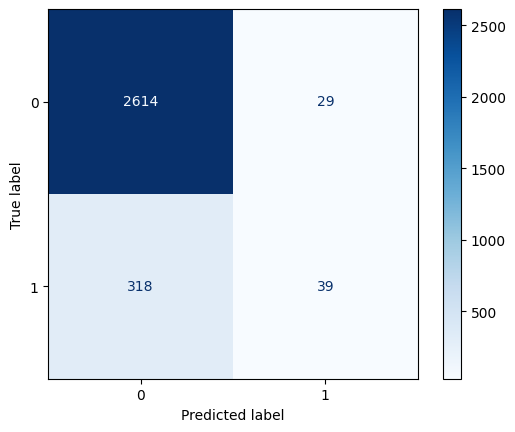

In [48]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, best_model.predict(x_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [49]:
from sklearn.metrics import classification_report

print(classification_report(y_test, best_model.predict(x_test), digits=4))

50/50 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

          no     0.8915    0.9890    0.9378      2643
         yes     0.5735    0.1092    0.1835       357

    accuracy                         0.8843      3000
   macro avg     0.7325    0.5491    0.5606      3000
weighted avg     0.8537    0.8843    0.8480      3000



In [67]:
# Instantiate the KerasClassifier with your Keras model
keras_clf = KerasClassifier(build_fn=create_model)

# Fit the KerasClassifier to your training data
keras_clf.fit(x_train, y_train)

# Evaluate the performance of the KerasClassifier using the score() method
score = keras_clf.score(x_test, y_test)
print("Test Score: ", score)



C:\Users\ankit\AppData\Local\Temp\ipykernel_19052\756589494.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_clf = KerasClassifier(build_fn=create_model)


94/94 [==============================] - 0s 2ms/step - loss: 1.1274 - accuracy: 0.8467
Test Score:  0.846666693687439


## KERAS SEQUENTIAL MODEL WITH GridSearchCV

### The code cells below uses Keras with a TensorFlow backend to run a grid search with cross-validation to determine the optimum hyperparameters for a binary classification model. The model is then trained using the optimal hyperparameters, predictions are made using test data, and accuracy is calculated.

In [62]:
# Define a dictionary to map "yes" and "no" to 1 and 0, respectively
label_mapping = {"yes": 1, "no": 0}

# Map target labels to numeric format
y_train = y_train.map(label_mapping)
y_test = y_test.map(label_mapping)


In [63]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import accuracy_score

# Define the function to create the Keras model
def create_model(optimizer='adam', activation='relu', neurons=64):
    model = Sequential()
    model.add(Dense(neurons, input_dim=x_train.shape[1], activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Create the KerasClassifier for GridSearchCV
model = KerasClassifier(build_fn=create_model, verbose=0)

# Define the hyperparameter search space
param_grid = {
    'optimizer': ['adam', 'sgd', 'rmsprop'],
    'activation': ['relu', 'tanh', 'sigmoid'],
    'neurons': [32, 64, 128]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Parameters: ", best_params)

# Train the model with the best hyperparameters
best_model = create_model(optimizer=best_params['optimizer'], activation=best_params['activation'], neurons=best_params['neurons'])
best_model.fit(x_train, y_train, epochs=10, batch_size=32, verbose=1)

# Make predictions on test data
y_pred = best_model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy: ", accuracy)


C:\Users\ankit\AppData\Local\Temp\ipykernel_19052\3896433227.py:17: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


44/44 [==============================] - 0s 2ms/step
Best Parameters:  {'activation': 'sigmoid', 'neurons': 32, 'optimizer': 'adam'}
Epoch 1/10
219/219 [==============================] - 2s 2ms/step - loss: 0.4373 - accuracy: 0.8024
Epoch 2/10
219/219 [==============================] - 1s 2ms/step - loss: 0.3182 - accuracy: 0.8864
Epoch 3/10
219/219 [==============================] - 1s 2ms/step - loss: 0.3007 - accuracy: 0.8864
Epoch 4/10
219/219 [==============================] - 1s 3ms/step - loss: 0.2930 - accuracy: 0.8864
Epoch 5/10
219/219 [==============================] - 1s 3ms/step - loss: 0.2864 - accuracy: 0.8864
Epoch 6/10
219/219 [==============================] - 1s 3ms/step - loss: 0.2819 - accuracy: 0.8867
Epoch 7/10
219/219 [==============================] - 1s 3ms/step - loss: 0.2778 - accuracy: 0.8871
Epoch 8/10
219/219 [==============================] - 1s 2ms/step - loss: 0.2801 - accuracy: 0.8871
Epoch 9/10
219/219 [==============================] - 1s 2ms/step -

# SUMMARY

### In conclusion, many models and techniques, such as the Keras sequential method with grid and randomized search and the MLP classifier with grid and randomized search, can be used to solve the binary classification problems. To make accurate predictions on fresh data, these strategies combine model selection, hyperparameter tweaking, model training and evaluation, model comparison, and model deployment.

### As per the results obtained, the accuracy scores for all the models tried such as MLP classifier model with randomized and grid search cv, Keri’s sequential model with grid and random searchCV, etc are almost same that is ~  85%. This can be because of many factors like the complexity of the problem, hyperparameter choices, model architecture, data preprocessing, unpredictability in the model training, or problems with overfitting or underfitting, among many other things.

### The dataset that i have chosen might not be complicated enough to benefit from various models or methodologies. Because if the data is straightforward and can be successfully predicted by a variety of models or methodologies, the outcomes may be identical. Also, i have tried using different hyperparameter settings, which again resulted in almost similar results. also, since the data preprocessing steps, such as data cleaning, feature engineering, and encoding categorical variables, are the same across various models or methodologies, the performance may be similar.

### The main application of the Keras sequential method is the construction of deep learning models for a variety of issues involving sequential or feedforward architectures, such as image classification, text classification, sequence-to-sequence issues, audio processing, natural language processing, recommender systems, and many other issues. So, overall it might be because of the not so complex behavior of the dats set, its not giving any different results.